In [31]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Data Wrangling

In [118]:
data=pd.read_csv("../SPY_daily.csv")
data.rename(columns={"1. open":"open","2. high":"high","3. low":"low","4. close":"close","5. volume":"volume"}, inplace=True)
data

,date,open,high,low,close,volume
0,2020-11-16,360.9800,362.7800,359.5900,362.5700,72203007.0
1,2020-11-13,355.2700,358.9000,354.7100,358.1000,62959429.0
2,2020-11-12,355.5800,356.7182,351.2600,353.2100,68118563.0
3,2020-11-11,356.4000,357.5600,355.0600,356.6700,58649048.0
4,2020-11-10,353.4900,355.1800,350.5100,354.0400,85552022.0
...,...,...,...,...,...,...
5291,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0
5292,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
5293,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
5294,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0


In [119]:
# Flipping the dataset
df = data[::-1].reset_index(drop=True)
df

,date,open,high,low,close,volume
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0
...,...,...,...,...,...,...
5291,2020-11-10,353.4900,355.1800,350.5100,354.0400,85552022.0
5292,2020-11-11,356.4000,357.5600,355.0600,356.6700,58649048.0
5293,2020-11-12,355.5800,356.7182,351.2600,353.2100,68118563.0
5294,2020-11-13,355.2700,358.9000,354.7100,358.1000,62959429.0


In [120]:
# Calculating SMA's
old_close=1
old_volume=1
close_list=[]
for index, row in df.iterrows():
    close=row["close"]
    volume=row["volume"]
    
    # Calculating moving averages
    if len(close_list)==65:
        close_list.pop(0)
    close_list.append(close)
    # 65 day
    if len(close_list)==65:
        avg_65_day=sum(close_list)/65
    else:
        avg_65_day=sum(close_list[:65])/len(close_list[:65])
    # 40 day
    if len(close_list)>=40:
        avg_40_day=sum(close_list[:40])/40
    else:
        avg_40_day=sum(close_list[:40])/len(close_list[:40])
    # 25 day
    if len(close_list)>=25:
        avg_25_day=sum(close_list[:25])/25
    else:
        avg_25_day=sum(close_list[:25])/len(close_list[:25])
    # 13 day
    if len(close_list)>=13:
        avg_13_day=sum(close_list[:13])/13
    else:
        avg_13_day=sum(close_list[:13])/len(close_list[:13])
    # 8 day
    if len(close_list)>=8:
        avg_8_day=sum(close_list[:8])/8
    else:
        avg_8_day=sum(close_list[:8])/len(close_list[:8])
    # 5 day
    if len(close_list)>=5:
        avg_5_day=sum(close_list[:5])/5
    else:
        avg_5_day=sum(close_list[:5])/len(close_list[:5])
    
    # Adding values to DataFrame
    df.loc[index, "5_day_avg_$"]=avg_5_day
    df.loc[index, "8_day_avg_$"]=avg_8_day
    df.loc[index, "13_day_avg_$"]=avg_13_day
    df.loc[index, "5_bar_avg_$"]=avg_25_day
    df.loc[index, "8_bar_avg_$"]=avg_40_day
    df.loc[index, "13_bar_avg_$"]=avg_65_day
    
    # Replacing closing information
    old_close=close
    old_volume=volume

In [121]:
df

,date,open,high,low,close,volume,5_day_avg_$,8_day_avg_$,13_day_avg_$,5_bar_avg_$,8_bar_avg_$,13_bar_avg_$
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,135.562500,135.562500,135.562500,135.562500,135.562500,135.562500
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,135.078100,135.078100,135.078100,135.078100,135.078100,135.078100
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,135.218733,135.218733,135.218733,135.218733,135.218733,135.218733
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,135.546850,135.546850,135.546850,135.546850,135.546850,135.546850
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,136.012480,136.012480,136.012480,136.012480,136.012480,136.012480
...,...,...,...,...,...,...,...,...,...,...,...,...
5291,2020-11-10,353.4900,355.1800,350.5100,354.0400,85552022.0,336.364000,336.996250,339.876154,341.444800,338.014750,339.928154
5292,2020-11-11,356.4000,357.5600,355.0600,356.6700,58649048.0,337.532000,337.831250,341.243846,341.685600,338.213750,340.295385
5293,2020-11-12,355.5800,356.7182,351.2600,353.2100,68118563.0,337.490000,338.516250,342.156923,341.621600,338.372250,340.538000
5294,2020-11-13,355.2700,358.9000,354.7100,358.1000,62959429.0,337.780000,339.427500,343.370000,341.374400,338.622750,340.865231


In [123]:
# data=df.drop(["date", "5_bar_avg_$", "13_day_avg_$", "5_day_avg_$", "8_day_avg_$", "13_day_avg_$", "13_bar_avg_$"], axis=1)
data=df[["open", "high", "low", "close", "5_day_avg_$"]]
data.tail()

,open,high,low,close,5_day_avg_$
5291,353.49,355.1800,350.51,354.04,336.364
5292,356.40,357.5600,355.06,356.67,337.532
5293,355.58,356.7182,351.26,353.21,337.490
5294,355.27,358.9000,354.71,358.10,337.780
5295,360.98,362.7800,359.59,362.57,338.308


**Scaling the Data**

In [124]:
# Scaling all the training data
MinMaxScaler = preprocessing.MinMaxScaler()  # MinMaxScaler == data_normaliser
X = MinMaxScaler.fit_transform(data) # X == data_normalized

In [125]:
# Days to use in prediction
history_points=50
# Variable to predict
column=3

In [126]:
# Building normalised training data in segments of 50x5
# Get the normalised next day open data
historical_data_normalised =      np.array([X[i  : i + history_points].copy() for i in range(len(X) - history_points)])
next_day_close_values_normalised = np.array([X[:,column][i + history_points].copy() for i in range(len(X) - history_points)])
next_day_close_values_normalised = np.expand_dims(next_day_close_values_normalised, -1)

In [127]:
# Retriving the real next day open values
next_day_close_values = np.array([data.iloc[:,column][i + history_points].copy() for i in range(len(data) - history_points)])
# Expanding the dimentions of next_day_open_values_normalised (5246, 1, 1)
unscaled_y = np.expand_dims(next_day_close_values, -1)
unscaled_y

array([[143.0625],
       [145.    ],
       [146.9687],
       ...,
       [353.21  ],
       [358.1   ],
       [362.57  ]])

In [128]:
y_normaliser = preprocessing.MinMaxScaler()
y_normaliser.fit(unscaled_y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [129]:
assert historical_data_normalised.shape[0] == next_day_close_values_normalised.shape[0]

**Creating final datasets**

In [130]:
test_split = 0.9 # percent of data to be used for testing
n = int(historical_data_normalised.shape[0] * test_split)

# splitting the dataset up into train and test sets

X_train = historical_data_normalised[:n]
y_train = next_day_close_values_normalised[:n]

X_test = historical_data_normalised[n:]
y_test = next_day_close_values_normalised[n:]

unscaled_y_test = unscaled_y[n:]

## Buildling the Model

In [133]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
np.random.seed(4)
tf.random.set_seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

In [134]:
model.fit(X_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss:{evaluation}")

Epoch 1/50
133/133 [==============================] - 3s 25ms/step - loss: 0.0138 - val_loss: 0.0039
Epoch 2/50
133/133 [==============================] - 3s 21ms/step - loss: 5.5672e-04 - val_loss: 0.0038
Epoch 3/50
133/133 [==============================] - 3s 21ms/step - loss: 3.9272e-04 - val_loss: 0.0023
Epoch 4/50
133/133 [==============================] - 3s 21ms/step - loss: 3.1113e-04 - val_loss: 0.0016
Epoch 5/50
133/133 [==============================] - 3s 20ms/step - loss: 3.0101e-04 - val_loss: 4.8023e-04
Epoch 6/50
133/133 [==============================] - 3s 21ms/step - loss: 2.7085e-04 - val_loss: 0.0011
Epoch 7/50
133/133 [==============================] - 3s 22ms/step - loss: 2.4705e-04 - val_loss: 0.0010
Epoch 8/50
133/133 [==============================] - 3s 21ms/step - loss: 2.4024e-04 - val_loss: 2.4716e-04
Epoch 9/50
133/133 [==============================] - 3s 21ms/step - loss: 2.2192e-04 - val_loss: 0.0010
Epoch 10/50
133/133 [==============================

**MSE of the normalized dataset**

In [135]:
y_test_predicted = model.predict(X_test)
# # # model.predict returns normalised values
# # # now we scale them back up using the y_scaler from before
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

# # # also getting predictions for the entire dataset, just to see how it performs
y_train_predicted = model.predict(X_train)
y_train_predicted = y_normaliser.inverse_transform(y_train_predicted)

# assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(f"Scaled MSE: {scaled_mse}")

Scaled MSE: 22.66552782807933


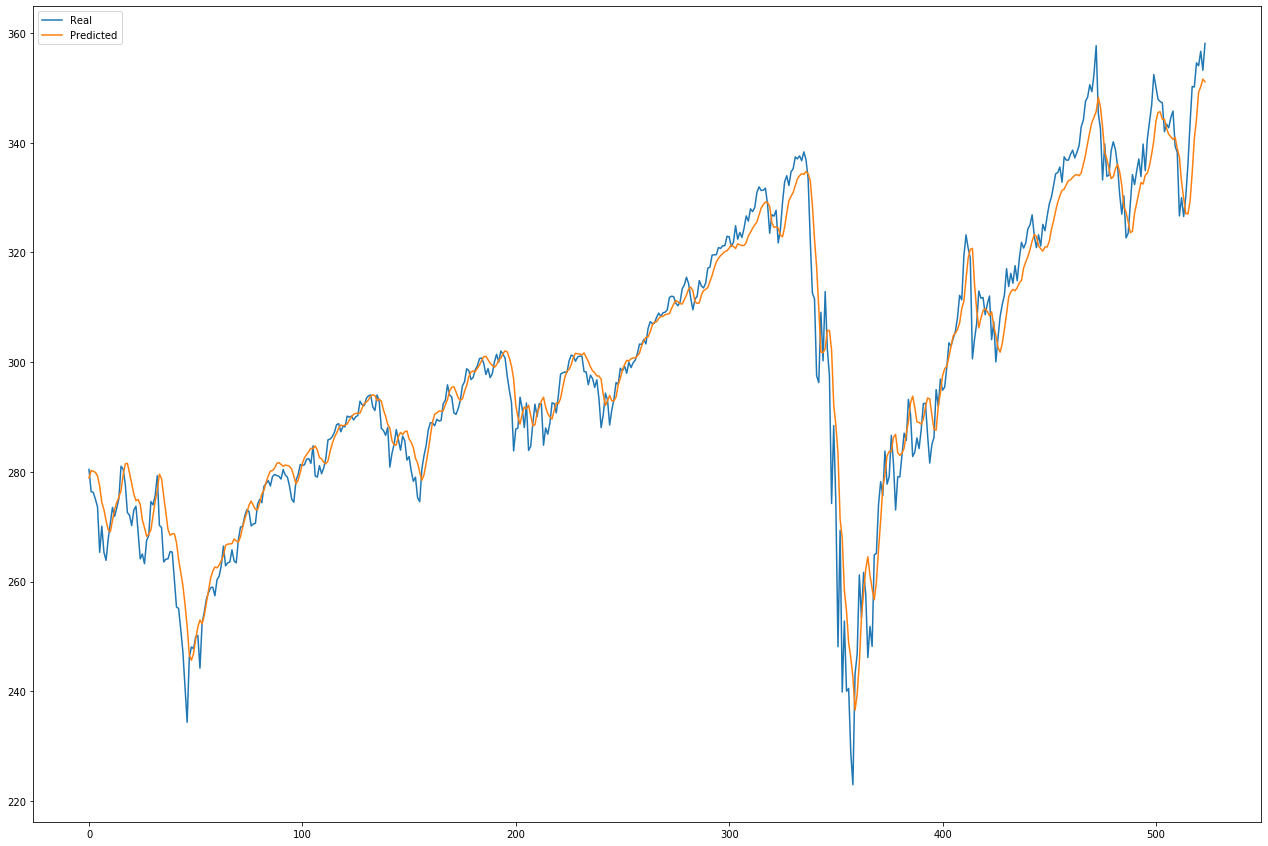

In [136]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

## Making predictions

In [51]:
data[-2:]

,open,high,low,close,volume,5_bar_avg_$,8_bar_avg_$,13_bar_avg_$
5294,355.27,358.90,354.71,358.10,62959429.0,341.3744,338.62275,340.865231
5295,360.98,362.78,359.59,362.57,72203007.0,340.9796,339.01250,341.261077


In [52]:
# Predicting today
d=data[-51:-1]
normalized_data=MinMaxScaler.fit_transform(d)
today=model.predict(np.expand_dims(normalized_data, 0))
today=y_normaliser.inverse_transform(today)
today

array([[330.34912]], dtype=float32)

In [53]:
# Predicting tomorrow
d=data[-50:]
normalized_data=MinMaxScaler.fit_transform(data)
tomorrow=model.predict(np.expand_dims(normalized_data, 0))
tomorrow=y_normaliser.inverse_transform(tomorrow)
tomorrow

array([[343.12317]], dtype=float32)

In [227]:
# model.save("predict_next_day_open.h5")